In [ ]:
!pip install tensorflow==2.0.0b1

     |████████████████████████████████| 88.7MB 44kB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 3.1MB 38.9MB/s 
     |████████████████████████████████| 501kB 50.0MB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install Keras==2.3.1

     |████████████████████████████████| 378kB 7.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip install Keras-Preprocessing==1.1.0

     |████████████████████████████████| 51kB 4.6MB/s 
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2


In [ ]:
!pip install matplotlib==3.1.2

In [ ]:
!pip install numpy==1.17.4

In [ ]:
 
import os
from google.colab import drive
 
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/tinkerhub/'

Mounted at /content/gdrive
/content/gdrive/My Drive/tinkerhub


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.layers import InputLayer
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
labels = ['jackfruit', 'mango']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('training')
val = get_data('testing')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


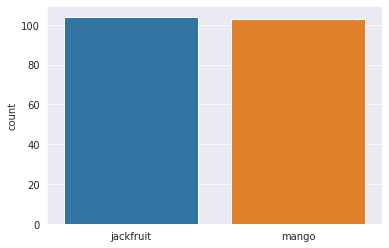

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("jackfruit")
    else:
        l.append("mango")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'jackfruit')

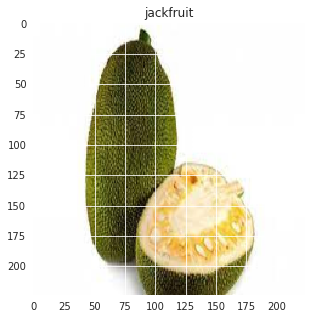

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Train on 207 samples, validate on 207 samples
Epoch 1/500
207/207 [==============================] - 13s 64ms/step - loss: 0.6917 - accuracy: 0.2850 - val_loss: 0.6913 - val_accuracy: 0.2319
Epoch 2/500
207/207 [==============================] - 13s 62ms/step - loss: 0.6899 - accuracy: 0.1836 - val_loss: 0.6910 - val_accuracy: 0.1884
Epoch 3/500
207/207 [==============================] - 13s 63ms/step - loss: 0.6916 - accuracy: 0.2029 - val_loss: 0.6907 - val_accuracy: 0.2174
Epoch 4/500
207/207 [==============================] - 13s 61ms/step - loss: 0.6880 - accuracy: 0.1884 - val_loss: 0.6903 - val_accuracy: 0.1739
Epoch 5/500
207/207 [==============================] - 13s 61ms/step - loss: 0.6900 - accuracy: 0.1546 - val_loss: 0.6900 - val_accuracy: 0.0870
Epoch 6/500
207/207 [==============================] - 13s 62ms/step - loss: 0.6894 - accuracy: 0.0966 - val_loss: 0.6897 - val_accuracy: 0.0773
Epoch 7/500
207/207 [==============================] - 13s 63ms/step - loss: 0.6928 

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['jackfruit','mango']))

              precision    recall  f1-score   support

   jackfruit       0.85      0.96      0.90       104
       mango       0.96      0.83      0.89       103

    accuracy                           0.90       207
   macro avg       0.91      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



In [ ]:
model.save('model.h5')

In [ ]:
from keras.preprocessing import image

mango


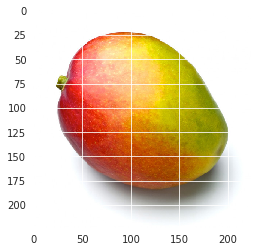

In [ ]:
img3 = image.load_img("training/mango/1 (10).png",target_size=(224,224)) ##loading the image
img3 = np.asarray(img3) ##converting to an array
img3 = img3 / 255 ##scaling by doing a division of 255
plt.imshow(img3)
img3 = np.expand_dims(img3, axis=0) ##expanding the dimensions
output = model.predict(img3)
if output[0][0] > output[0][1]:
    print("jackfruit")
else:
    print('mango')